In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Load data, file_path can be edited depending on the file location

In [2]:
file_path = "M:/DataScience/house-prices-advanced-regression-techniques/"
train = pd.read_csv(file_path + "train.csv", header = 0)
test = pd.read_csv(file_path + "test.csv", header = 0)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following features will be used in this notebook

In [4]:
col_init = ['OverallCond','YearBuilt','GrLivArea','LotArea',
            '1stFlrSF','BsmtUnfSF','OverallQual',
            'TotalBsmtSF','GarageCars','WoodDeckSF','BedroomAbvGr',
            'BsmtQual','Neighborhood','GarageArea',
            'SalePrice']

The feature `BsmtQual` is catergorical and we will perform ordinal transformation

In [5]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [6]:
#dictionary for mapping the quality
map_val = {'Ex':4,'Gd':3,'TA':2,'Fa':1}

In [7]:
train['BsmtQual'] = train['BsmtQual'].map(map_val)

### Missing values

In [8]:
train[col_init].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallCond   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   LotArea       1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   BsmtUnfSF     1460 non-null   int64  
 6   OverallQual   1460 non-null   int64  
 7   TotalBsmtSF   1460 non-null   int64  
 8   GarageCars    1460 non-null   int64  
 9   WoodDeckSF    1460 non-null   int64  
 10  BedroomAbvGr  1460 non-null   int64  
 11  BsmtQual      1423 non-null   float64
 12  Neighborhood  1460 non-null   object 
 13  GarageArea    1460 non-null   int64  
 14  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 171.2+ KB


- We not from above `BsmtQual` has missing values
- We will impute the missing values with the most frequent values

In [9]:
train['BsmtQual'].value_counts()

2.0    649
3.0    618
4.0    121
1.0     35
Name: BsmtQual, dtype: int64

In [10]:
train['BsmtQual'].fillna(2.0,inplace=True)

### Data Visualization

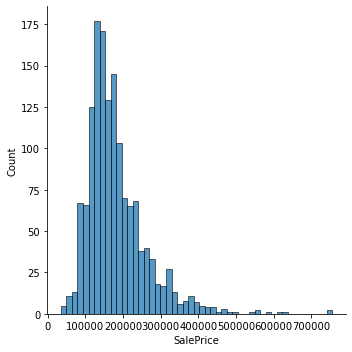

In [11]:
sns.displot(train['SalePrice'])

Data for target variable `SalePrice` is skewed

Let's try a log transformation

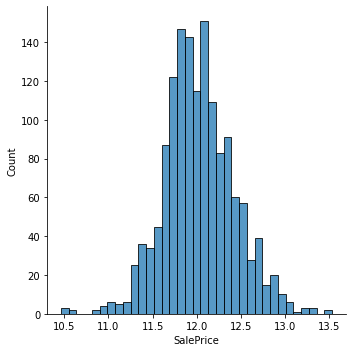

In [12]:
sns.displot(np.log1p(train['SalePrice']))

The data now follows the normal distribution curve

Checking the dependent vs independent variables

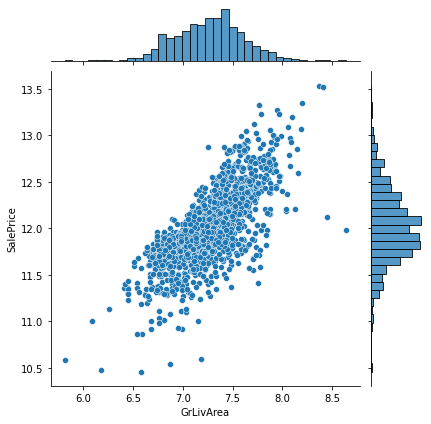

In [13]:
sns.jointplot(x=np.log1p(train['GrLivArea']),y=np.log1p(train['SalePrice']))

There are two outlier values in `GrLivArea` to be dropped

In [14]:
np.log1p(train['GrLivArea']).sort_values(ascending=False)

1298    8.638171
523     8.450412
1182    8.406708
691     8.370316
1169    8.196437
          ...   
528     6.406880
29      6.255750
916     6.175867
1100    6.084499
533     5.814131
Name: GrLivArea, Length: 1460, dtype: float64

In [15]:
train.drop(index=[1298,523],inplace=True)

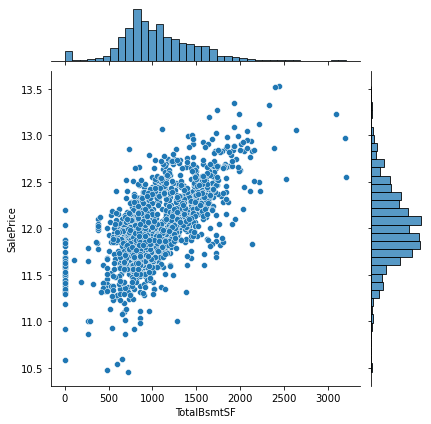

In [16]:
sns.jointplot(x=train['TotalBsmtSF'],y=np.log1p(train['SalePrice']))

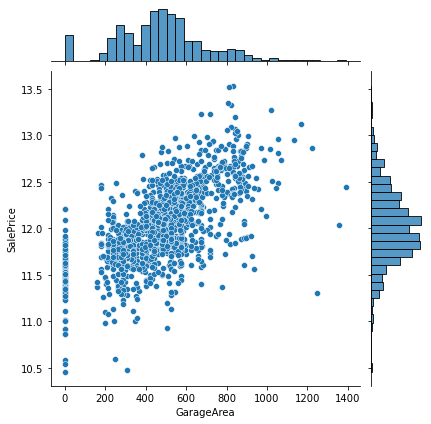

In [17]:
sns.jointplot(x=train['GarageArea'],y=np.log1p(train['SalePrice']))

We will drop rows with zero `GarageArea` and the three outliers

In [18]:
train['GarageArea'].sort_values(ascending=False)

581     1390
1190    1356
1061    1248
825     1220
178     1166
        ... 
635        0
99         0
620        0
614        0
1219       0
Name: GarageArea, Length: 1458, dtype: int64

In [19]:
train.drop(index=[581,1190,1061], inplace=True)
idx = train.index[train['GarageArea']==0]
train.drop(index=idx, inplace=True)

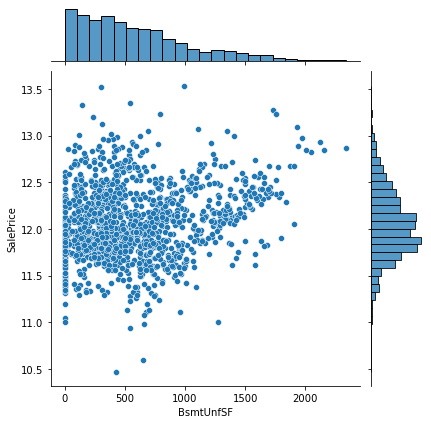

In [20]:
sns.jointplot(x=(train['BsmtUnfSF']),y=np.log1p(train['SalePrice']))

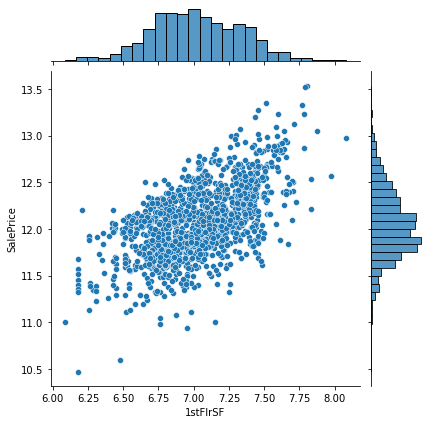

In [21]:
sns.jointplot(x=np.log1p(train['1stFlrSF']),y=np.log1p(train['SalePrice']))

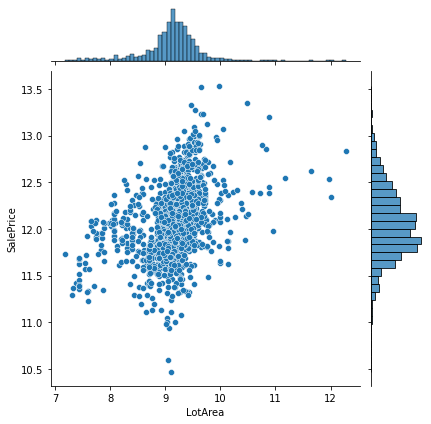

In [22]:
sns.jointplot(x=np.log1p(train['LotArea']),y=np.log1p(train['SalePrice']))

### Feature engineering

as from the visualizations

In [23]:
train['GrLivArea'] = np.log1p(train['GrLivArea'])
train['1stFlrSF'] = np.log1p(train['1stFlrSF'])
train['LotArea'] = np.log1p(train['LotArea'])
train['WoodDeckSF'] = np.log1p(train['WoodDeckSF'])
train['SalePrice'] = np.log1p(train['SalePrice'])

### Dummy Variable creation for train data

In [24]:
df_train = pd.get_dummies(train[col_init])

### Feature transformation for test data

In [25]:
test['GrLivArea'] = np.log1p(test['GrLivArea'])
test['LotArea'] = np.log1p(test['LotArea'])
test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])


In [26]:
col_init.pop()

'SalePrice'

As was done for the train data, we will also convert `BsmtQual` in test data

In [27]:
test['BsmtQual'] = test['BsmtQual'].map(map_val)

### Missing values in test data

In [28]:
test[col_init].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallCond   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   GrLivArea     1459 non-null   float64
 3   LotArea       1459 non-null   float64
 4   1stFlrSF      1459 non-null   float64
 5   BsmtUnfSF     1458 non-null   float64
 6   OverallQual   1459 non-null   int64  
 7   TotalBsmtSF   1458 non-null   float64
 8   GarageCars    1458 non-null   float64
 9   WoodDeckSF    1459 non-null   float64
 10  BedroomAbvGr  1459 non-null   int64  
 11  BsmtQual      1415 non-null   float64
 12  Neighborhood  1459 non-null   object 
 13  GarageArea    1458 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 159.7+ KB


In [29]:
df_test = test[col_init].copy()

In [30]:
df_test['BsmtQual'].value_counts()

2.0    634
3.0    591
4.0    137
1.0     53
Name: BsmtQual, dtype: int64

In [31]:
df_test['BsmtQual'].fillna(2.0,inplace=True)

In [32]:
df_test['GarageCars'].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [33]:
df_test['GarageCars'].fillna(1.0,inplace=True)

In [34]:
df_test.fillna(df_test.mean(),inplace=True)

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallCond   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   GrLivArea     1459 non-null   float64
 3   LotArea       1459 non-null   float64
 4   1stFlrSF      1459 non-null   float64
 5   BsmtUnfSF     1459 non-null   float64
 6   OverallQual   1459 non-null   int64  
 7   TotalBsmtSF   1459 non-null   float64
 8   GarageCars    1459 non-null   float64
 9   WoodDeckSF    1459 non-null   float64
 10  BedroomAbvGr  1459 non-null   int64  
 11  BsmtQual      1459 non-null   float64
 12  Neighborhood  1459 non-null   object 
 13  GarageArea    1459 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 159.7+ KB


### Model training and evaluation

Import the necessary modules

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Train-test split

- 20% of the train data will be used in validation

In [37]:
X_train_full = df_train.drop(['SalePrice'],axis=1)
y_train_full = df_train['SalePrice']
X_test = pd.get_dummies(df_test)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,test_size=0.2,random_state=1)

In [38]:
# Mscaler = MinMaxScaler().fit(X_train)
# XM_train = Mscaler.transform(X_train)
# XM_val = Mscaler.transform(X_val)

# Mscaler = MinMaxScaler().fit(X_train)
# XM_train_full = Mscaler.transform(X_train_full)
# XM_test = Mscaler.transform(X_test)

# Sscaler = StandardScaler().fit(X_train)
# XS_train = Sscaler.transform(X_train)
# XS_val = Sscaler.transform(X_val)

# Sscaler = StandardScaler().fit(X_train_full)
# XS_train_full = Sscaler.transform(X_train_full)
# XS_test = Sscaler.transform(X_test)

### Linear Regression Model + Training + evaluation

In [39]:
lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_val)

mse(np.expm1(y_pred), np.expm1(y_val))

477202897.7813934

Training with the full data

In [40]:
lr_model.fit(X_train_full,y_train_full)

LinearRegression()

### OutPut

In [42]:
y_test = np.expm1(lr_model.predict(X_test))
output = pd.DataFrame({'Id':test.Id,'SalePrice':y_test})
output.to_csv(file_path + 'sub.csv', index=False)